# Market Basket Analysis - E Commerce

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
from mlxtend.frequent_patterns import apriori, association_rules

In [2]:
df = pd.read_csv('Groceries_dataset.csv')
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [4]:
df.isna().sum()

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [5]:
df['Member_number'] = df['Member_number'].astype(str)
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

In [6]:
print("Number of unique Items:", df['itemDescription'].nunique())
print("Number of clients:", df['Member_number'].nunique())

Number of unique Items: 167
Number of clients: 3898


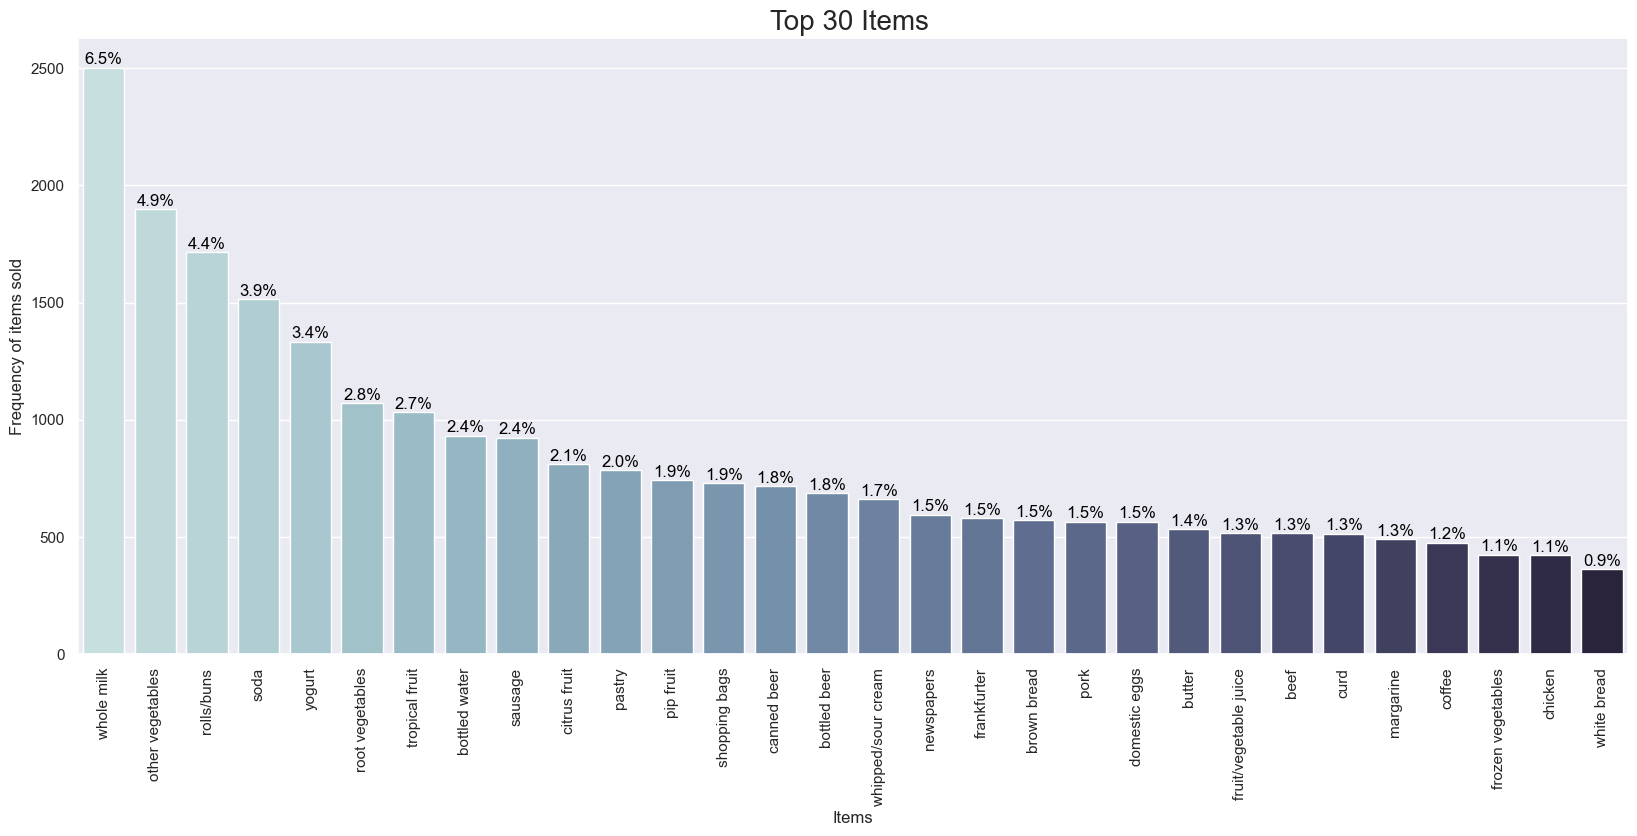

In [7]:
fig, ax = plt.subplots(figsize=(20, 8))

# Select the top 30 items
top_items = df['itemDescription'].value_counts().head(30).index
df_top30 = df[df['itemDescription'].isin(top_items)]

# Create the count plot
sns.countplot(data=df_top30, x='itemDescription', order=top_items, palette = "ch:start=.2,rot=-.3")

# Recalculating the type_counts just to have clarity.
type_counts = df_top30['itemDescription'].value_counts()

# get the current tick locations and labels
locs, labels = plt.xticks(rotation=90)

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):
    # get the text property for the label to get the correct count
    count = type_counts[label.get_text()]
    sum_days = df['itemDescription'].value_counts().sum()
    pct_string = '{:0.1f}%'.format(100 * count / sum_days)

    # print the annotation just below the top of the bar
    plt.text(loc, count + 2, pct_string, ha='center',va='bottom', color='black')
    
# Set labels and title
ax.set(xlabel='Items', ylabel='Frequency of items sold')
plt.title('Top 30 Items ', fontsize=20)

plt.show()


In [8]:
df.sort_values(by='Date', inplace = True)
print("This dataset contains data spanning", df["Date"]\
      .nunique(), "days, from", df['Date'].iloc[0].strftime('%Y-%m-%d'), "to", df['Date'].iloc[-1].strftime('%Y-%m-%d'),".")

This dataset contains data spanning 728 days, from 2014-01-01 to 2015-12-30 .


In [9]:
#Create baskets with unique transactions(UT)
UT= df.copy()
UT['itemDescription'] = UT['itemDescription'].apply(lambda x: (x ,))
UT = UT.groupby(['Member_number','Date']).agg(sum).reset_index()
UT.rename(columns={'itemDescription': 'Items_set'},inplace=True)
UT['uniqueTransaction'] = UT['Member_number']+ '_' + UT['Date'].astype(str)
UT.head()

,Member_number,Date,Items_set,uniqueTransaction
0,1000,2014-06-24,"(salty snack, whole milk, pastry)",1000_2014-06-24
1,1000,2015-03-15,"(whole milk, yogurt, sausage, semi-finished br...",1000_2015-03-15
2,1000,2015-05-27,"(soda, pickled vegetables)",1000_2015-05-27
3,1000,2015-07-24,"(misc. beverages, canned beer)",1000_2015-07-24
4,1000,2015-11-25,"(sausage, hygiene articles)",1000_2015-11-25


In [10]:
UT['Month'] = pd.to_datetime(UT['Date']).dt.strftime("%Y-%m")

In [11]:
Transactions_per_month= pd.DataFrame(UT.groupby('Month').count()['Items_set']).reset_index()

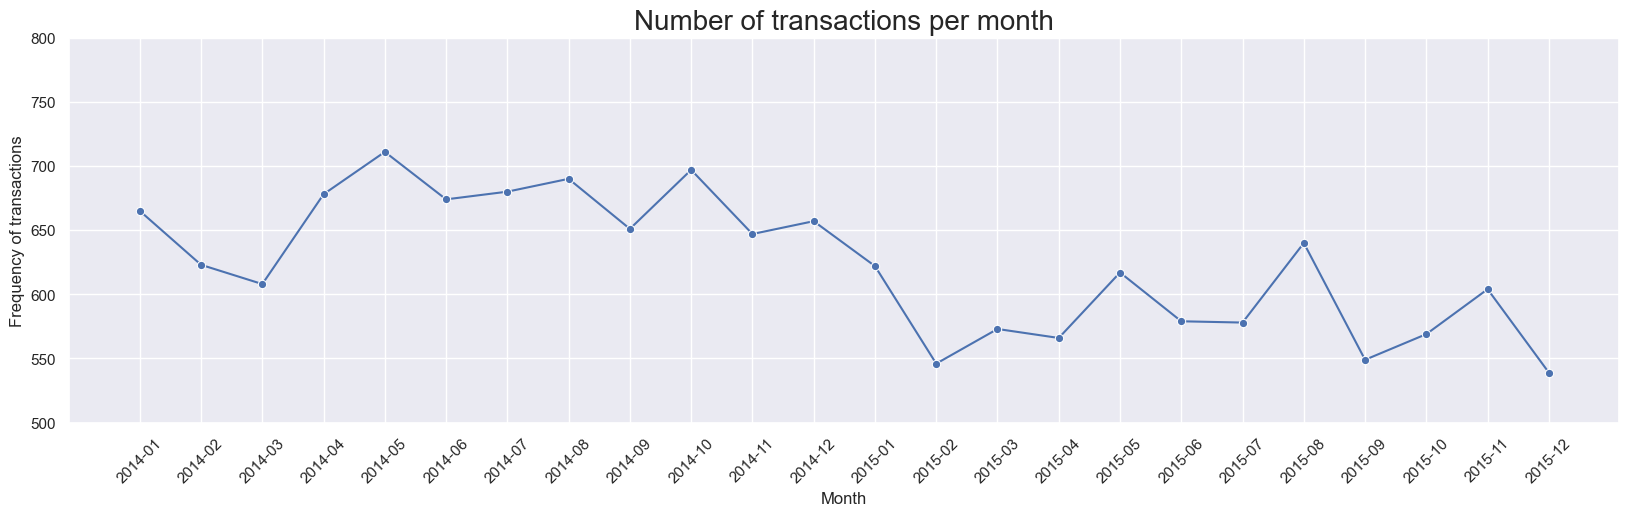

In [12]:
fig, ax = plt.subplots(figsize=(20, 5))
sns.lineplot(data = Transactions_per_month, x =Transactions_per_month['Month']\
             .astype(str), y = 'Items_set', marker='o', linestyle='-')
plt.xticks(rotation = 45);
ax.set_ylim(500,800)
plt.title('Number of transactions per month', fontsize=20)
plt.xlabel('Month')
plt.ylabel('Frequency of transactions')

plt.show()

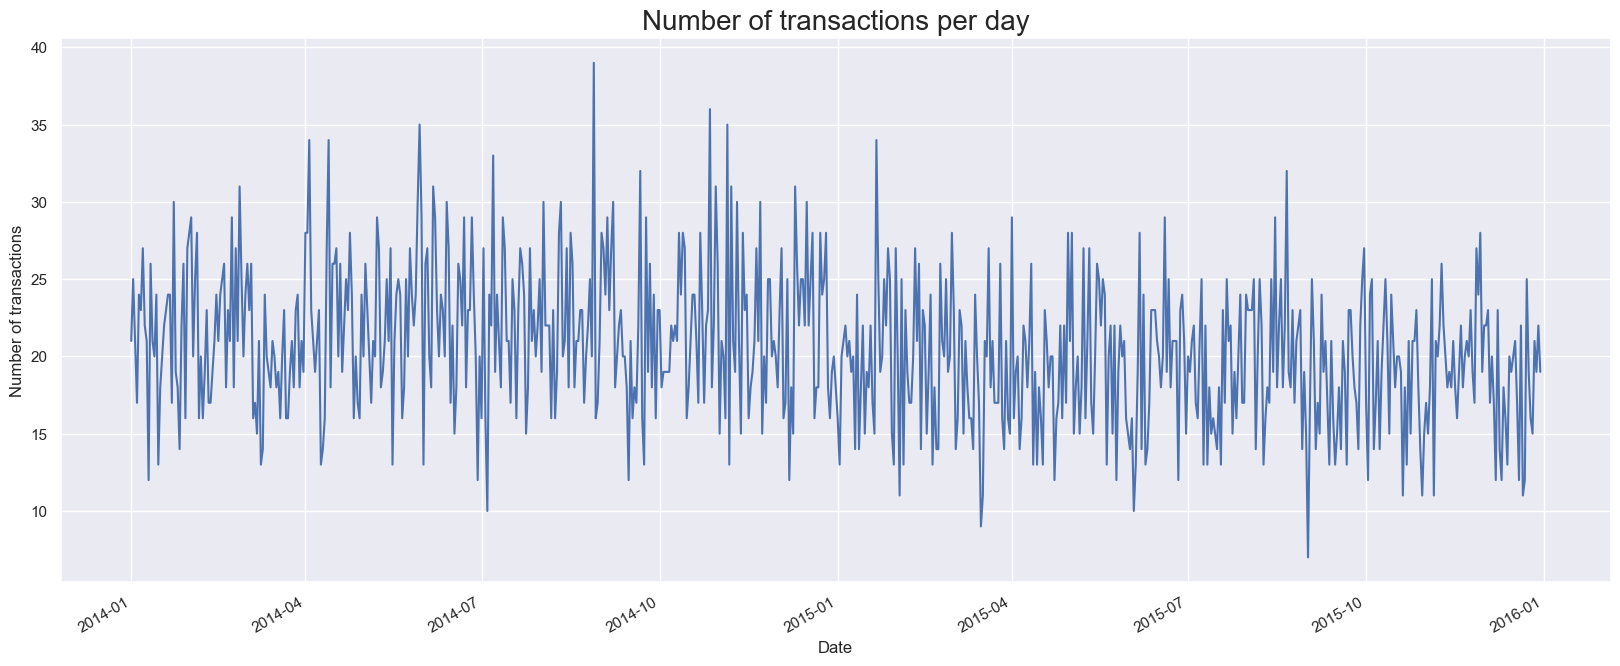

In [13]:
UT.groupby('Date')['Items_set'].size() \
.plot( figsize = (20,8), grid = True)\
.set(xlabel = "Date", ylabel = "Number of transactions")
plt.title("Number of transactions per day", fontsize=20);

In [14]:
transactions= UT.Items_set.tolist()

In [15]:
from mlxtend.preprocessing import TransactionEncoder

In [16]:
#Transform transactions into the right format to apply apriori algorithm
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
Baskets = pd.DataFrame(te_ary, columns=te.columns_, index = UT['uniqueTransaction'])

In [17]:
Baskets.head()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
uniqueTransaction,,,,,,,,,,,,,,,,,,,,,
1000_2014-06-24,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1000_2015-03-15,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
1000_2015-05-27,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1000_2015-07-24,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1000_2015-11-25,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [18]:
frequent_itemsets = apriori(Baskets, min_support=0.0045, use_colnames=True)\
.sort_values(by='support')

In [19]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold =1)

>'zhangs_metric':\
>Measures both association and dissociation. Value ranges between -1 and 1. A positive value (>0) indicates Association and negative value indicated dissociation.

In [20]:
#Filter the rules according to a positive zhangs_metric
Top_associated_items = rules[rules['zhangs_metric'] > 0]
Top_associated_items

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(citrus fruit),(yogurt),0.053131,0.085879,0.004611,0.086792,1.010642,0.000049,1.001001,0.011121
1,(yogurt),(citrus fruit),0.085879,0.053131,0.004611,0.053696,1.010642,0.000049,1.000598,0.011520
2,(other vegetables),(frankfurter),0.122101,0.037760,0.005146,0.042146,1.116150,0.000536,1.004579,0.118536
3,(frankfurter),(other vegetables),0.037760,0.122101,0.005146,0.136283,1.116150,0.000536,1.016420,0.108146
4,(sausage),(yogurt),0.060349,0.085879,0.005748,0.095238,1.108986,0.000565,1.010345,0.104587
5,(yogurt),(sausage),0.085879,0.060349,0.005748,0.066926,1.108986,0.000565,1.007049,0.107508
6,(soda),(sausage),0.097106,0.060349,0.005948,0.061253,1.014975,0.000088,1.000963,0.016341
7,(sausage),(soda),0.060349,0.097106,0.005948,0.098560,1.014975,0.000088,1.001613,0.015702


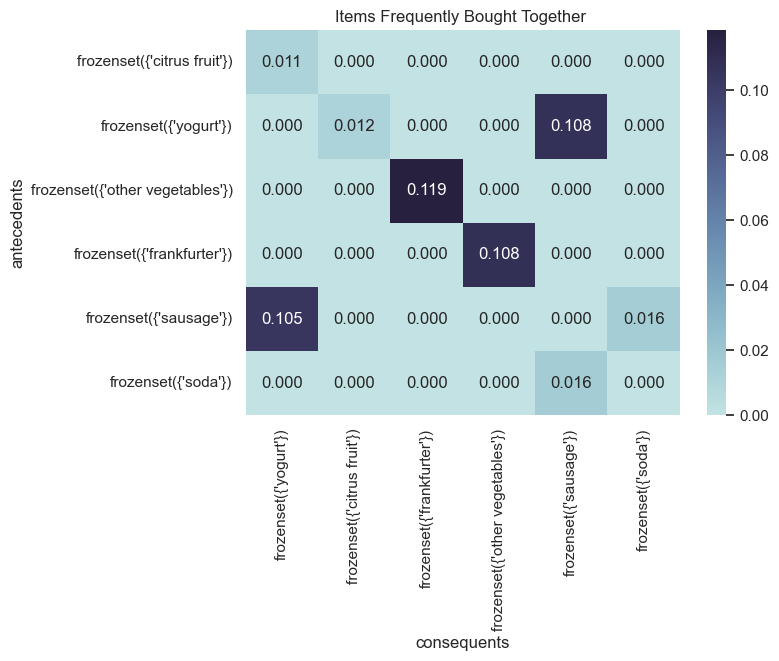

In [21]:

associated_items = Top_associated_items.pivot(index='antecedents', columns='consequents', values='zhangs_metric').fillna(0)

plt.figure(figsize=(7, 5))
sns.heatmap(associated_items, annot=True, cmap=sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True), fmt=".3f")
plt.title("Items Frequently Bought Together ")
plt.show()